In [1]:
import pandas as pd
import numpy as np
import os
import re

In [2]:
def muraki_model(r, lamb, x):
    if lamb <= x:
        return 1 - r**lamb
    else:
        return (1 - r**x) * (r**(lamb - x))

In [3]:
al_n_values = np.linspace(1, 2, 2, dtype='int_')
ga_n_values = np.linspace(1, 2, 2, dtype='int_')
r_values = np.linspace(0.1, 0.6, 6)

In [4]:
comb = {}

for al_n in al_n_values:
    for ga_n in ga_n_values:
        for r in r_values:
            ga_n_percent = 0.0
            for layers_num in range(1, al_n + ga_n + 1):
                ga_n_percent += muraki_model(r, layers_num, ga_n)
            comb[round(ga_n_percent / layers_num, 4)] = (al_n, ga_n, r)
            


In [5]:
print(comb)

{0.495: (1, 1, 0.1), 0.48: (1, 1, 0.2), 0.455: (1, 1, 0.30000000000000004), 0.42: (1, 1, 0.4), 0.375: (1, 1, 0.5), 0.32: (1, 1, 0.6), 0.663: (1, 2, 0.1), 0.6507: (1, 2, 0.2), 0.6277: (1, 2, 0.30000000000000004), 0.592: (1, 2, 0.4), 0.5417: (1, 2, 0.5), 0.4747: (1, 2, 0.6), 0.333: (2, 1, 0.1), 0.3307: (2, 1, 0.2), 0.3243: (2, 1, 0.30000000000000004), 0.312: (2, 1, 0.4), 0.2917: (2, 1, 0.5), 0.2613: (2, 1, 0.6), 0.4997: (2, 2, 0.1), 0.4976: (2, 2, 0.2), 0.4912: (2, 2, 0.30000000000000004), 0.4776: (2, 2, 0.4), 0.4531: (2, 2, 0.5), 0.4136: (2, 2, 0.6)}


In [24]:
data = []

files = os.listdir("result")
for file in files:
    temp = re.search(r'(\d+)K', file).group(1)
    ga_n_layer = re.search(r'GaN_cubic(0.\d*)', file).group(1)
    y, x, r = comb[float(ga_n_layer)]
    kappa = pd.read_csv(f"result/{file}", header=1, names=["thick", "crossplane", "kappa_bulk"])
    kappa['y'] = y
    kappa['x'] = x
    kappa['r'] = r
    kappa['temp'] = float(temp)
    
    data.append(kappa)

df = pd.concat(data)
df.drop('kappa_bulk', axis=1, inplace=True)
print(df)

           thick  crossplane  y  x    r   temp
0   1.258930e-09    0.756279  1  2  0.2  300.0
1   1.584890e-09    0.850536  1  2  0.2  300.0
2   1.995260e-09    0.950066  1  2  0.2  300.0
3   2.511890e-09    1.054570  1  2  0.2  300.0
4   3.162280e-09    1.163830  1  2  0.2  300.0
..           ...         ... .. ..  ...    ...
45  3.981070e-05   10.247800  1  2  0.6  400.0
46  5.011870e-05   10.281700  1  2  0.6  400.0
47  6.309570e-05   10.309000  1  2  0.6  400.0
48  7.943280e-05   10.330900  1  2  0.6  400.0
49  1.000000e-04   10.348500  1  2  0.6  400.0

[4800 rows x 6 columns]


In [7]:
df.to_csv("df.csv", index=False)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [25]:
x = df[['y', 'x', 'r', 'temp', 'thick']]
y = df['crossplane']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.4)

In [98]:
model = LinearRegression()
model.fit(train_x, train_y)
pred = model.predict(test_x)
regression_mse_loss = metrics.mean_squared_error(pred, test_y)
regression_max_loss = metrics.max_error(pred, test_y)
regression_r2_loss = metrics.r2_score(pred, test_y)

ML = 5.646156136474204, MSE = 5.1986310660066675, r2 = -0.8121778844510001


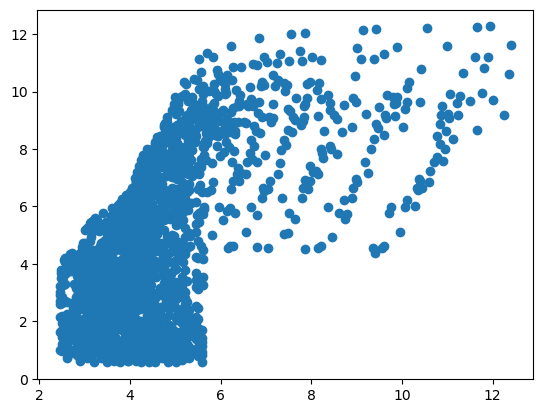

In [99]:
print(f"ML = {regression_max_loss}, MSE = {regression_mse_loss}, r2 = {regression_r2_loss}")
plt.plot(pred, test_y, 'o')

In [100]:
from sklearn.svm import SVR

In [101]:
model = SVR()
model.fit(train_x, train_y)
pred = model.predict(test_x)
regression_mse_loss = metrics.mean_squared_error(pred, test_y)
regression_max_loss = metrics.max_error(pred, test_y)
regression_r2_loss = metrics.r2_score(pred, test_y)

ML = 7.9205023293030585, MSE = 8.305557664706289, r2 = -3304.515942500458


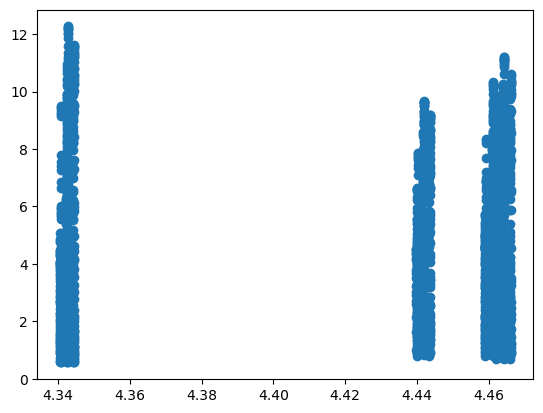

In [102]:
print(f"ML = {regression_max_loss}, MSE = {regression_mse_loss}, r2 = {regression_r2_loss}")

plt.plot(pred, test_y, 'o')

In [103]:
from sklearn.ensemble import GradientBoostingRegressor

In [104]:
model = GradientBoostingRegressor()
model.fit(train_x, train_y)
pred = model.predict(test_x)
regression_mse_loss = metrics.mean_squared_error(pred, test_y)
regression_max_loss = metrics.max_error(pred, test_y)
regression_r2_loss = metrics.r2_score(pred, test_y)

ML = 3.27692651228935, MSE = 0.8955786435037187, r2 = 0.8762688856655456


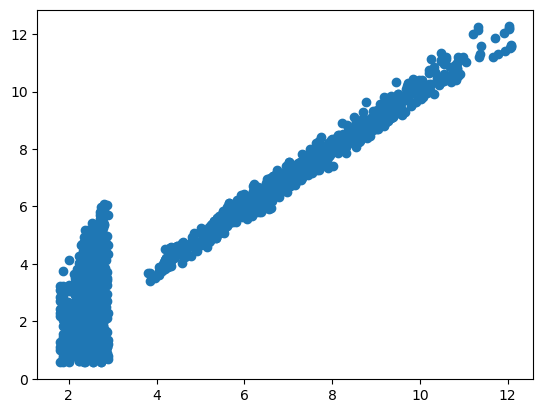

In [105]:
print(f"ML = {regression_max_loss}, MSE = {regression_mse_loss}, r2 = {regression_r2_loss}")

plt.plot(pred, test_y, 'o')

In [106]:
from sklearn.neighbors import KNeighborsRegressor


In [107]:
model = KNeighborsRegressor(n_neighbors=2, weights='distance')

model.fit(train_x, train_y)
pred = model.predict(test_x)
regression_mse_loss = metrics.mean_squared_error(pred, test_y)
regression_max_loss = metrics.max_error(pred, test_y)
regression_r2_loss = metrics.r2_score(pred, test_y)

ML = 1.3781503687259988, MSE = 0.0366158075314909, r2 = 0.9954767912341086


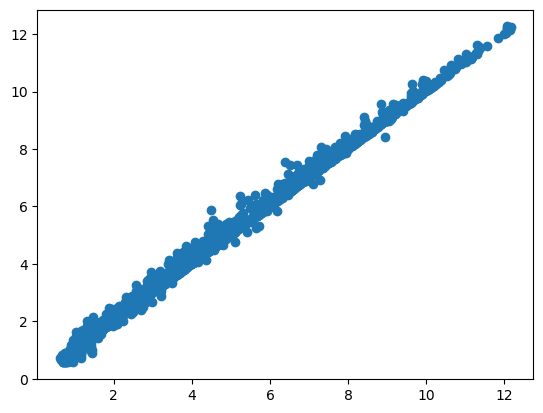

In [108]:
print(f"ML = {regression_max_loss}, MSE = {regression_mse_loss}, r2 = {regression_r2_loss}")

plt.plot(pred, test_y, 'o')

In [68]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from pandas import DataFrame

# class MyDataset(Dataset):
#     def __init__(self, x: DataFrame, y: DataFrame):
#         self.x_train = torch.tensor(x, dtype=torch.float32)
#         self.y_train = torch.tensor(y.values, dtype=torch.float32)
#     def __len__(self):
#         return len(self.y_train)
   
#     def __getitem__(self,idx):
#         return self.x_train[idx], self.y_train[idx]
x_train_tensor = torch.tensor(train_x.values, dtype=torch.float32)
y_train_tensor = torch.tensor(train_y.values, dtype=torch.float32)
x_test_tensor = torch.tensor(test_x.values, dtype=torch.float32)
y_test_tensor = torch.tensor(test_y.values, dtype=torch.float32)

train_ds = TensorDataset(x_train_tensor, y_train_tensor)
test_ds = TensorDataset(x_test_tensor, y_test_tensor)

# train_ds = MyDataset(train_x, train_y)
# test_ds = MyDataset(test_x, test_y)

batch_size = 16
train_loader = DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True) 
test_loader = DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=False)

In [69]:
class LogisticRegression(torch.nn.Module):    
    # build the constructor
    def __init__(self, n_inputs):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(n_inputs, 1)
    # make predictions
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [70]:
n_inputs = 5
log_regr = LogisticRegression(n_inputs)

In [74]:
from sklearn.metrics import mean_squared_error, r2_score

optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()
 
epochs = 200
mse_values = []
r2_values = []

for epoch in range(epochs):
    log_regr.train()
    for inp, targets in train_loader:
        optimizer.zero_grad()
        outputs = log_regr(inp)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
    
    log_regr.eval()
    
    with torch.no_grad():
        predictions = log_regr(x_test_tensor).squeeze().numpy()

    mse = mean_squared_error(test_y, predictions)
    r2 = r2_score(test_y, predictions)

    # Сохранение значений MSE и R-squared
    mse_values.append(mse)
    r2_values.append(r2)
    

In [76]:
print(mse_values)


[31371524.53294053, 1432267.1646039789, 2120820.7222193815, 5849112.948865541, 12187976.110822465, 1812949.0662182989, 16984723.612317204, 12191645.056264745, 255919.04303757887, 424420.19300091616, 11712244.21863606, 5907491.597022214, 60444.102711957225, 1086.0111132120712, 6930143.917807416, 8698409.763682341, 691955.2650327911, 3452688.039033154, 2619026.286174213, 10788742.212986656, 1955044.0231413662, 233679.68719218968, 6320310.285338928, 15755555.456313288, 19832179.234473847, 30583995.38880864, 12115562.398889478, 1530606.5332764017, 7212543.448739732, 537983.8349541995, 25627552.34694864, 14633314.790304763, 5040914.239822813, 2714685.641978399, 1866.8465376536572, 1165633.2550576185, 5813256.752128317, 2122312.6897084215, 4611362.063821917, 1845366.2389484418, 1140735.7053888221, 1118075.4907297976, 213388.32618388822, 9834347.1910351, 2536684.8031168454, 37724359.28277019, 14311887.610527279, 22010558.12444307, 4852633.951430503, 1953984.9163154447, 1884840.122637619, 8224

In [117]:
percents = np.linspace(0.2, 1, 5)

errors_models = {}

models = {
            LinearRegression: "Linear Regression",
            SVR: "SVR", 
            GradientBoostingRegressor: "Gradient Boosting", 
            KNeighborsRegressor: "K Neighbors"
        }

In [139]:
for model_constr, name in models.items():
    mses = {}
    max_loss = {}
    r2 = {}
    model = model_constr()
    for percent in percents:
        cur_df = df.head(int(percent * len(df)))
        x = cur_df[['y', 'x', 'r', 'temp', 'thick']]
        y = cur_df['crossplane']
        train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.4)
        model.fit(train_x, train_y)
        pred = model.predict(test_x)
        regression_mse_loss = metrics.mean_squared_error(pred, test_y)
        regression_max_loss = metrics.max_error(pred, test_y)
        regression_r2_loss = metrics.r2_score(pred, test_y)
        
        mses[percent] = regression_mse_loss
        max_loss[percent] = regression_max_loss
        r2[percent] = max(regression_r2_loss, -10)
    errors_models[name] = {
        "MSE": mses,
        "Max Loss": max_loss,
        "r2": r2
    }

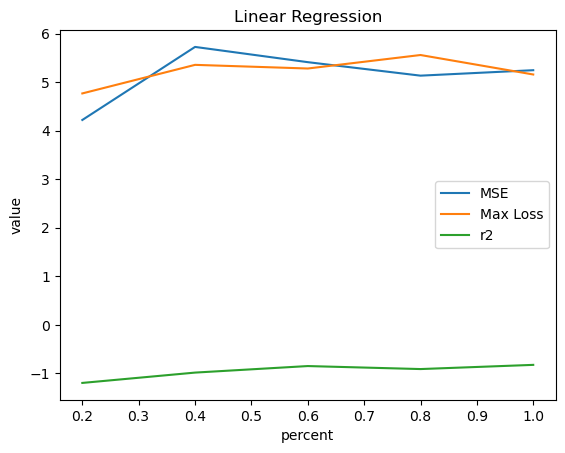

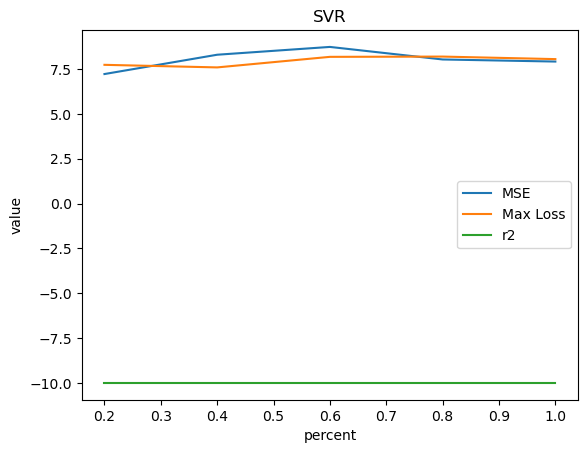

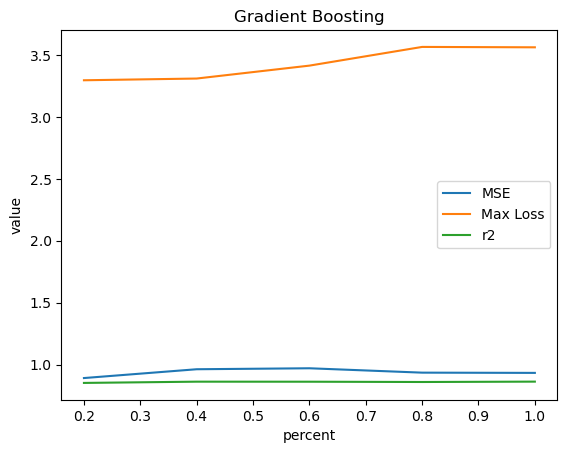

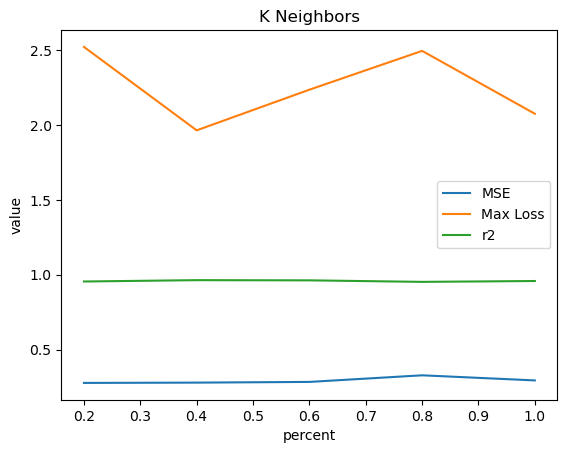

In [140]:
for name, errors in errors_models.items():
    for error_name, values in errors.items():
        x, y = zip(*values.items())
        plt.plot(x, y, label = error_name)
    plt.legend()
    plt.title(name)
    plt.xlabel("percent")
    plt.ylabel("value")
    plt.show()